**Regression : Multiple Linear Regression**

In [61]:
import matplotlib.pyplot as plt #import the required libraries
import numpy as np
import pandas as pd

In [62]:
#define your data
x1 = np.array([10.2,11.6,9.8, 13.7, 12])
x2 = np.array([9.9,9.9,11.7,9.5,8.9])
y = np.array([71.7,63,71.7, 58.3, 61.8])

In [60]:
#create a data frame with your data points
data= pd.DataFrame({"x1" : x1, "x2" : x2, "y" : y})
data

,x1,x2,y
0,10.2,9.9,71.7
1,11.6,9.9,63.0
2,9.8,11.7,71.7
3,13.7,9.5,58.3
4,12.0,8.9,61.8


In [73]:
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  #perform linear regression using the in built libraries in python
x_sum = np.array(data[["x1", "x2"]]).reshape(5,2)
y_lr = np.array(data["y"]).reshape(5,1)
regr.fit(x_sum, y_lr)
print(regr.coef_)
print(regr.intercept_)

[[-3.56974217  0.46416223]]
[101.5769062]


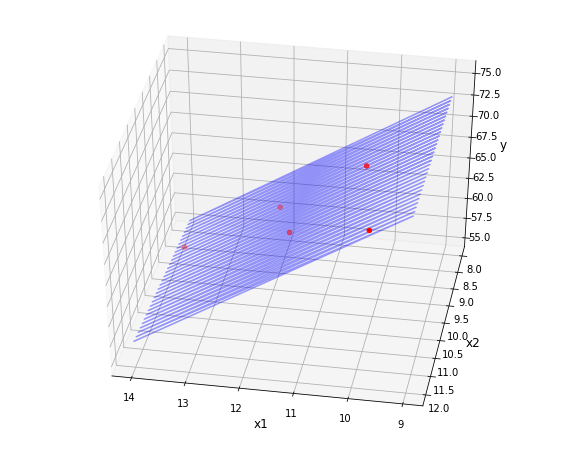

In [77]:
#visualize your plot
x = data[['x1', 'x2']].values.reshape(-1,2)  
y = data['y']
X = x[:, 0]  
Y = x[:, 1]  
Z = y

x_pred = np.linspace(9, 14, 30)   
y_pred = np.linspace(8, 12, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)  
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T  

model = regr.fit(x,y) 
predicted = model.predict(model_viz)  

fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(X, Y, Z, c='r') 
ax.plot(xx_pred.flatten(), yy_pred.flatten(), predicted, alpha =0.4, color = 'blue') 
ax.set_xlabel('x1', fontsize=12)  
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('y', fontsize=12)

ax.view_init(elev=40, azim=100) 

In [55]:
x1_mean = round(data["x1"].mean(),2) #perform ordinary least squares regression
x2_mean = round(data["x2"].mean(),2)
y_mean = round(data["y"].mean(),2)
print(x1_mean, x2_mean, y_mean)

11.46 9.98 65.3


In [20]:
weight1 = np.sum((x1 - x1_mean)* (y - y_mean))/np.sum((x1 - x1_mean)**2) #these are your initial weights to start gradient descent with
weight2 = np.sum((x2 - x2_mean)* (y - y_mean))/np.sum((x2 - x2_mean)**2)
bias = y_mean - (weight1 * x1_mean) - (weight2 * x2_mean)
print(round(weight1,2))
print(round(weight2,2))
print(round(bias,2))

-3.78
4.08
67.93


In [130]:
#define your error/cost function (MSE) and your method to minimize your cost function (gradient descent)
#your multiple linear regression equation is of the form : y_hat = weight1*x1 + weight2*x2 + bias

n = 5

def mean_squared_error(y, y_hat):
    cost = np.sum((y-y_hat)**2) / n
    return cost

def gradient_descent(x1, x2, y):
      
    weight1 = -3.4
    weight2 = 0.5
    bias = 101
    iterations = 20000
    learning_rate = 0.004     
    costs = []
    weights1 = []
    weights2 = []
    previous_cost = None
       
    for i in range(iterations):
          
        y_hat = (weight1 * x1) + (weight2 * x2) + bias
          
        current_cost = mean_squared_error(y, y_hat)
        if current_cost <= 1e-4:
          break
        previous_cost = current_cost
  
        costs.append(current_cost)
        weights1.append(weight1)
        weights2.append(weight2)
          
        weight1_pderivative = -(2/n) * sum(x1 * (y-y_hat))
        weight2_pderivative = -(2/n) * sum(x2 * (y-y_hat))
        bias_derivative = -(2/n) * sum(y-y_hat)
          
        weight1 = weight1 - (learning_rate * weight1_pderivative)
        weight2 = weight2 - (learning_rate * weight2_pderivative)
        bias = bias - (learning_rate * bias_derivative)
                  
        print(f"Iteration {i+1}: Cost {current_cost}, Weight1 {weight1}, Weight2 {weight2}, Bias {bias}")
    return weight1, weight2, bias

In [131]:
estimated_weight1, estimated_weight2, estimated_bias = gradient_descent(data["x1"], data["x2"], data["y"])
print(f"Estimated Weight1: {estimated_weight1}\nEstimated Weight2: {estimated_weight2}\nEstimated Bias: {estimated_bias}") #print your final estimated weights and bias

Streaming output truncated to the last 5000 lines.
Iteration 15004: Cost 1.9218863148809486, Weight1 -3.552364584164679, Weight2 0.4913321462058187, Bias 101.10577045798188
Iteration 15005: Cost 1.9218863037302838, Weight1 -3.552364829920645, Weight2 0.4913317619655806, Bias 101.10577712084117
Iteration 15006: Cost 1.9218862925799407, Weight1 -3.552365075673133, Weight2 0.4913313777307784, Bias 101.10578378360623
Iteration 15007: Cost 1.9218862814298947, Weight1 -3.5523653214221476, Weight2 0.49133099350140846, Bias 101.10579044627707
Iteration 15008: Cost 1.9218862702801645, Weight1 -3.552365567167685, Weight2 0.4913306092774739, Bias 101.10579710885368
Iteration 15009: Cost 1.9218862591307668, Weight1 -3.552365812909748, Weight2 0.491330225058972, Bias 101.10580377133607
Iteration 15010: Cost 1.9218862479816685, Weight1 -3.552366058648335, Weight2 0.49132984084590425, Bias 101.10581043372424
Iteration 15011: Cost 1.921886236832896, Weight1 -3.552366304383448, Weight2 0.49132945663826

Here you can see that even after 20,000 uterations the cost value doesn't change. Which means that for this dataset, there is always some percentage of error, hence the least value of the cost function is 1.9 and not near to 0. This is okay, depending on your dataset, the cost values keep changing, always remember that you need your cost value to decrease and become constant after iterations, but need not necessarily make it near to 0.

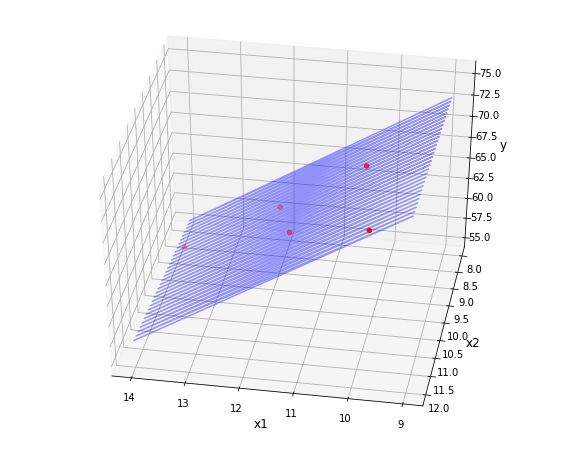

In [133]:
#visualize your plot
x = data[['x1', 'x2']].values.reshape(-1,2)  
y = data['y']
X = x[:, 0]  
Y = x[:, 1]  
Z = y

x_pred = np.linspace(9, 14, 30)   
y_pred = np.linspace(8, 12, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)  
#model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T  

predicted = estimated_weight1*xx_pred.flatten() + estimated_weight2*yy_pred.flatten() + estimated_bias  

fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(X, Y, Z, c='r') 
ax.plot(xx_pred.flatten(), yy_pred.flatten(), predicted, alpha =0.4, color = 'blue') 
ax.set_xlabel('x1', fontsize=12)  
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('y', fontsize=12)

ax.view_init(elev=40, azim=100) 


*   The Multiple Linear Regression by **mathematics** : y_hat = -3.55 * x1 + 0.489 * x2 + 101.13
*   The Multiple Linear Regression by **Libraries** : y_hat = -3.56 * x1 + 0.464 *x2 + 101.57

In [134]:
x1 = np.array([11.2,10.2,10.6, 9.5, 11.8])
x2 = np.array([10.1,11.1,10.7, 12.6,10])
data= pd.DataFrame({"x1" : x1, "x2" : x2})
data

,x1,x2
0,11.2,10.1
1,10.2,11.1
2,10.6,10.7
3,9.5,12.6
4,11.8,10.0


In [136]:
y1 = round(-3.55*11.2 + 0.489*10.1 + 101.13, 2)
y2 = round(-3.55*10.2 + 0.489*11.1 + 101.13, 2)
y3 = round(-3.55*10.6 + 0.489*10.7 + 101.13, 2)
y4 = round(-3.55*9.5 + 0.489*12.6 + 101.13, 2)
y5 = round(-3.55*11.8 + 0.489*10 + 101.13, 2)
print(y1, y2, y3, y4, y5)

66.31 70.35 68.73 73.57 64.13
